# Analyse Univariée

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as  sns
sns.set() 
# sns.set_theme(style='whitegrid')

In [2]:
operations_data = pd.read_csv('operations_data_enrichies.csv', parse_dates=[1])
operations_stats = pd.DataFrame()

def add_stats(index_label, df, stat):
    if index_label in df.index:
        df.drop(index_label, inplace=True)
    df= pd.concat([df,pd.DataFrame(data={'min':[stat.min()],'mean':[stat.mean()],'median':[stat.median()],'mode':[stat.mode()[0]],'max':[stat.max()]}, index=[index_label])])
    return df

# 1 Tendances Centrales : mean, mode, median

## 1.1 Debit

min      -500.000000
mean      -30.338049
median    -12.280000
mode       -5.990000
max        -0.230000
Name: Debit, dtype: float64


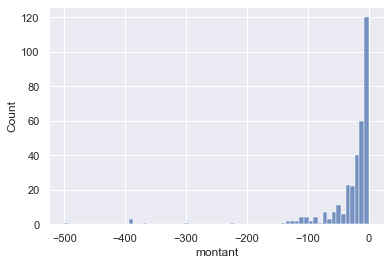

In [3]:
debit=operations_data[operations_data['montant']<0]['montant']

operations_stats = add_stats('Debit', operations_stats, debit)
print(operations_stats.loc['Debit'])
# print('Debit:', debit.max(), debit.mean(), debit.median(), debit.mode()[0], debit.min())

h=sns.histplot(data=(debit), log_scale=False)

## 1.2 Credit

min          4.6500
mean       365.1752
median     150.0000
mode       150.0000
max       1207.4500
Name: Credit, dtype: float64


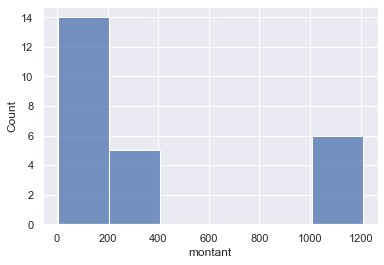

In [4]:
credit=operations_data[operations_data['montant']>0]['montant']

operations_stats = add_stats('Credit', operations_stats, credit)
print(operations_stats.loc['Credit'])
# print('Credit:', credit.min(), credit.mean(), credit.median(), credit.mode()[0], credit.max())

h=sns.histplot(data=credit, log_scale=False)

## 1.3 Montant (Credit & Debit)

min       -500.000000
mean        -2.327195
median     -10.000000
mode        -5.990000
max       1207.450000
Name: Montant, dtype: float64


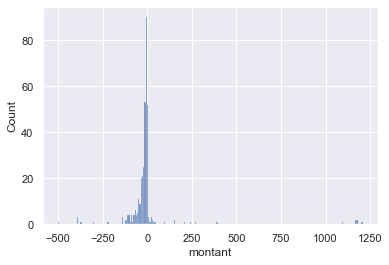

In [5]:
montant=operations_data['montant']

operations_stats = add_stats('Montant', operations_stats, montant)
print(operations_stats.loc['Montant'])
# print('Montant:', montant.min(), montant.mean(), montant.median(), montant.mode()[0], montant.max())

h=sns.histplot(data=montant, log_scale=False)

## 1.4 Solde

min       -362.580000
mean       459.140425
median     404.900000
mode       204.450000
max       1426.280000
Name: Solde, dtype: float64


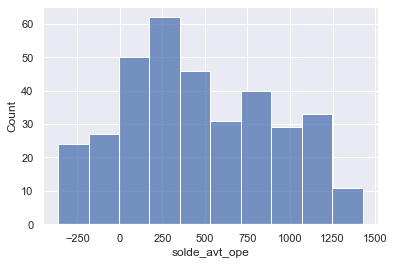

In [6]:
solde=operations_data['solde_avt_ope']

operations_stats = add_stats('Solde', operations_stats, solde)
print(operations_stats.loc['Solde'])
# print('Solde:', solde.min(), solde.mean(), solde.median(), solde.mode()[0], solde.max())

h=sns.histplot(data=solde, log_scale=False)

            min        mean  median    mode      max
Debit   -500.00  -30.338049  -12.28   -5.99    -0.23
Credit     4.65  365.175200  150.00  150.00  1207.45
Montant -500.00   -2.327195  -10.00   -5.99  1207.45
Solde   -362.58  459.140425  404.90  204.45  1426.28


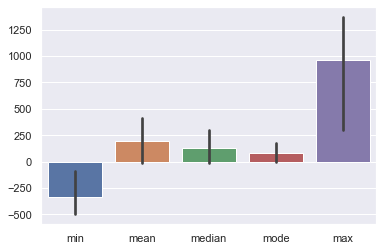

In [7]:
print(operations_stats)
h=sns.barplot(data=operations_stats)

## 1.5 Dépenses (credit) Par Catégories

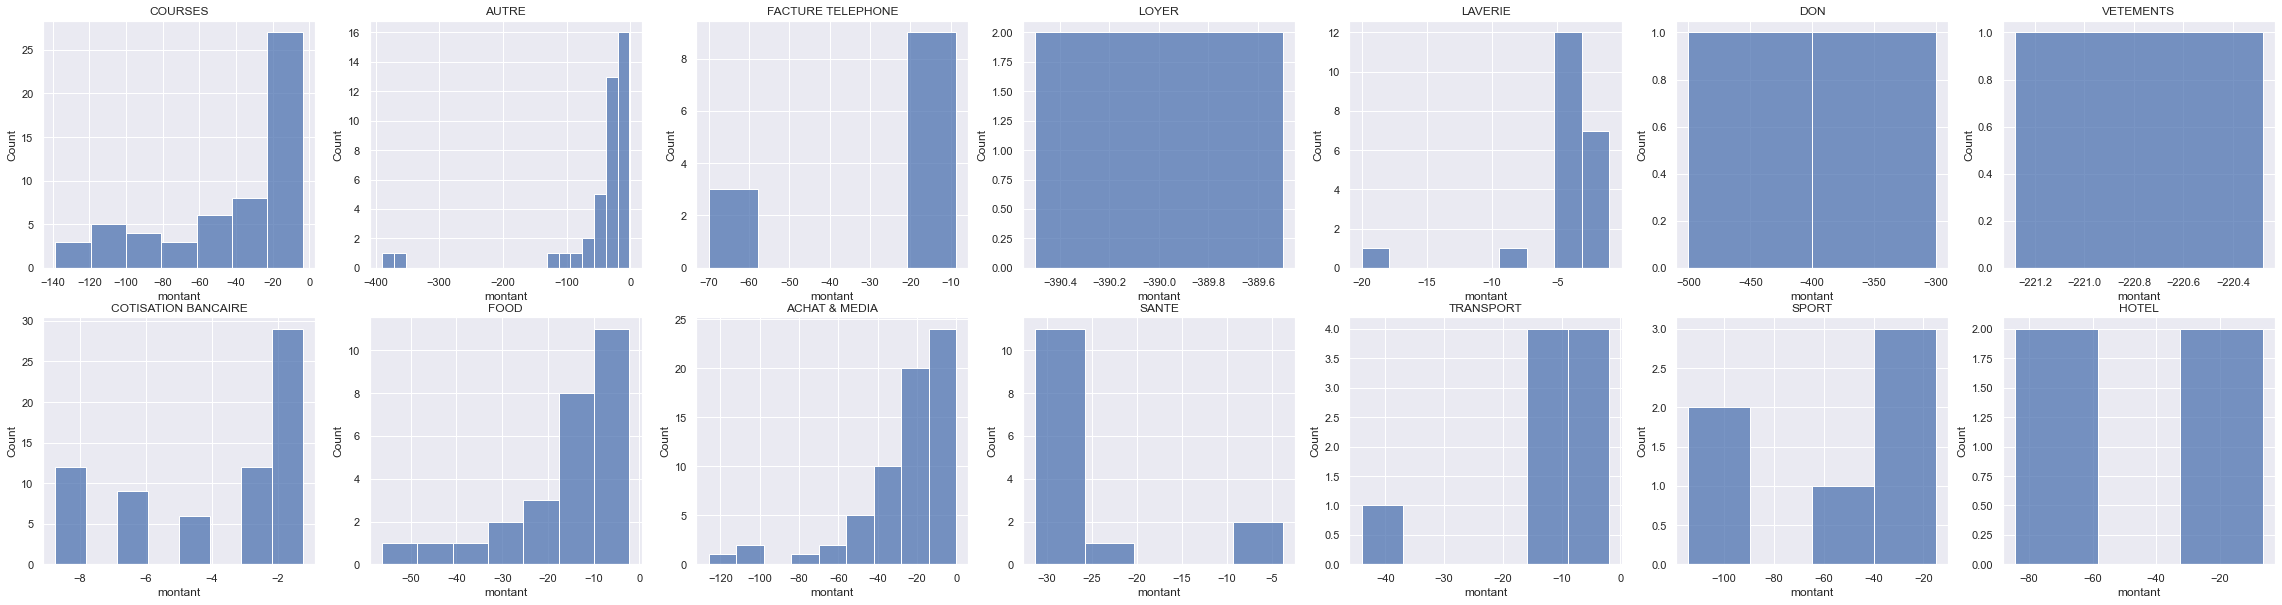

In [8]:
categories = operations_data['categ'].unique()
nb_categories = len(categories)

fig, axes = plt.subplots(2, nb_categories//2, figsize=(40,10), sharex=False, sharey=False)

for j in range(0, nb_categories//2):
    for i in range(2):
        index=j*2+i
        sns.histplot(data=operations_data[(operations_data['montant']<0) & (operations_data['categ']==categories[index])]['montant'], ax=axes[i,j])
        axes[i,j].set_title(categories[index])

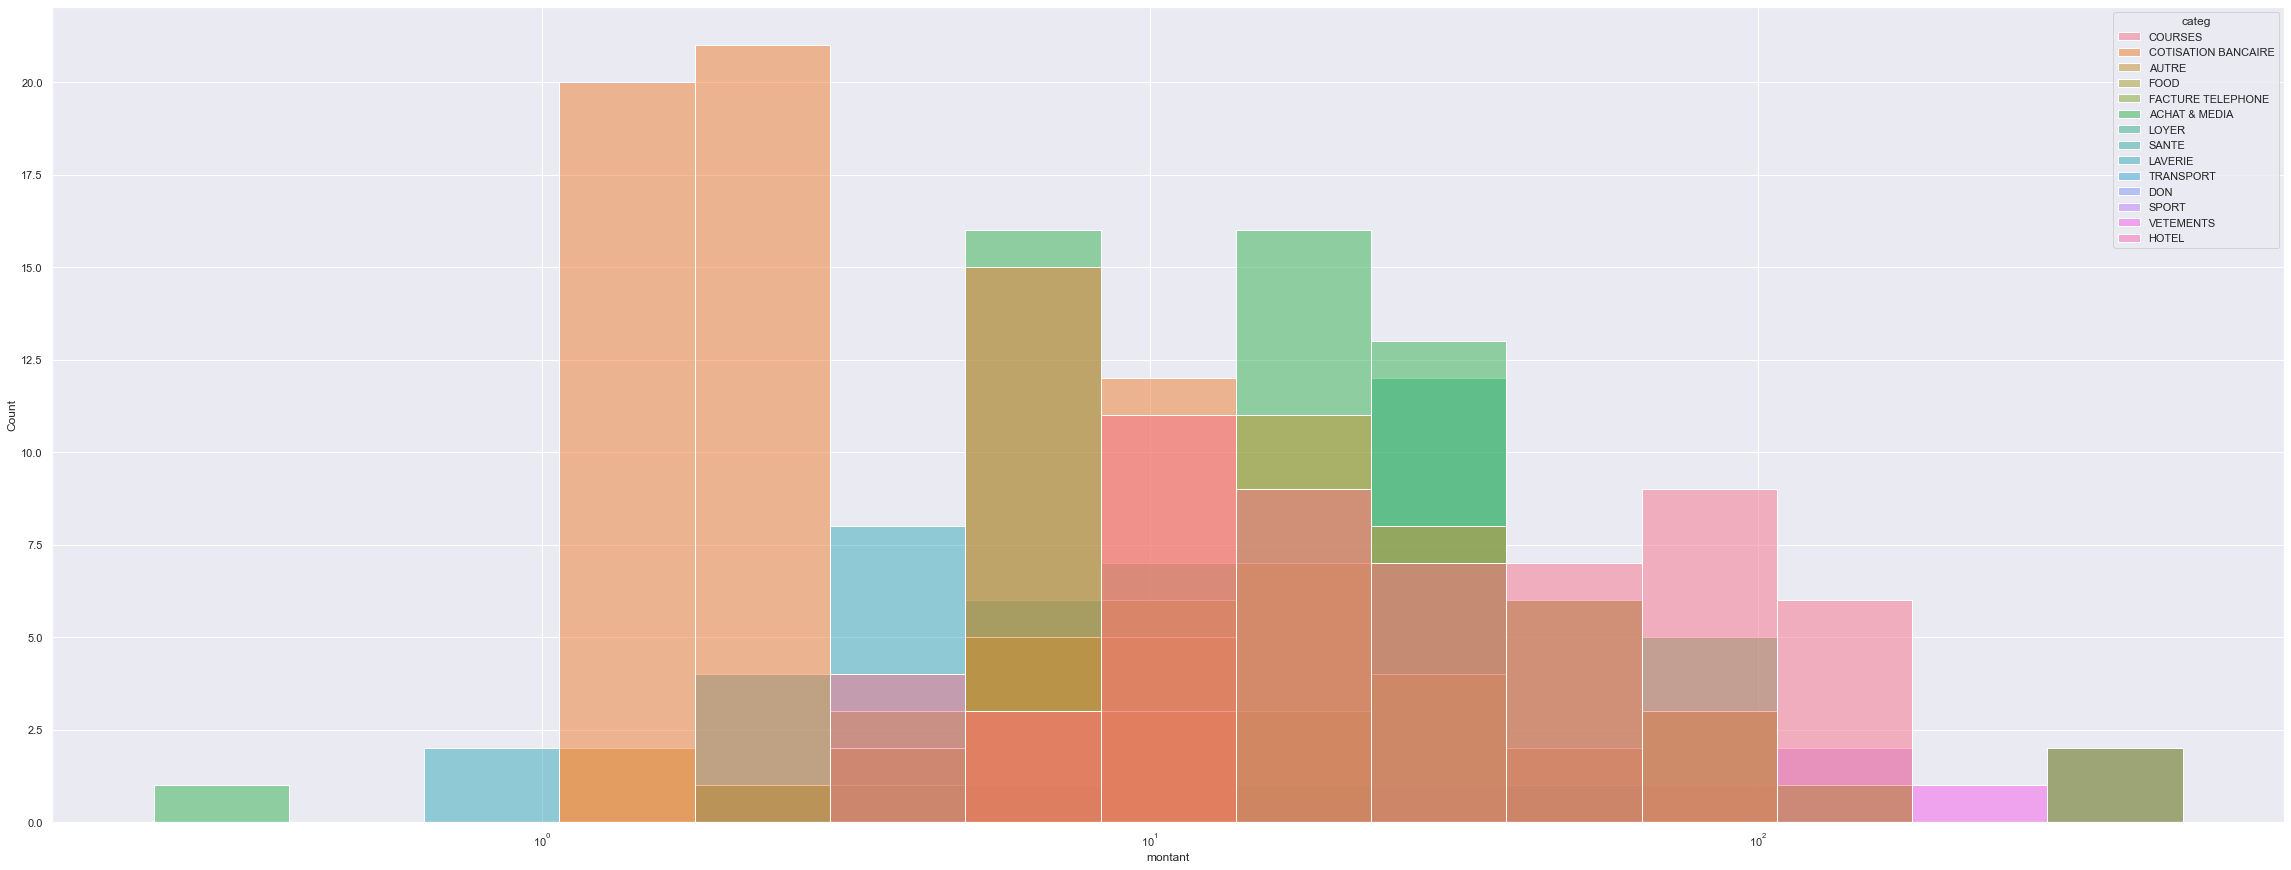

In [9]:
fig, axes = plt.subplots(figsize=(40,15), sharex=False, sharey=False)

ax= sns.histplot(hue=operations_data['categ'], x=np.abs(operations_data[(operations_data['montant']<0)]['montant']), ax=axes, log_scale=True)

# 2 Mesures de dispersion : var, std, cv

In [21]:
def add_stats2(index_label, df, stat):
    if index_label in df.index:
        df.drop(index_label, inplace=True)
    df= pd.concat([df,pd.DataFrame(data={'min':[stat.min()],'mean':[stat.mean()],'median':[stat.median()],'mode':[stat.mode()[0]],'max':[stat.max()],'sum':[stat.sum()],'var':[stat.var(ddof=0)],'std':[stat.std(ddof=0)],'cv':[np.abs(stat.std(ddof=0)/stat.mean()*100)], 'count':[stat.count()]}, index=[index_label])])

    df2=df['count']*df['std']*df['cv']
    df['count*std*cv(/)']=df2/df2.max()*100
    return df

In [22]:
categories = operations_data['categ'].unique()
categories_stats = pd.DataFrame()

for categorie in categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['categ']==categorie)]['montant']    
    categories_stats = add_stats2(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,sum,var,std,cv,count,count*std*cv(/)
COURSES,-138.65,-42.873571,-23.565,-138.65,-3.61,-2400.92,1578.937973,39.735852,92.681461,56,37.357890
COTISATION BANCAIRE,-8.75,-3.827794,-2.250,-2.25,-1.25,-260.29,7.399244,2.720155,71.063255,68,2.381039
AUTRE,-390.00,-47.547073,-22.500,-20.00,-1.28,-1949.43,6402.078977,80.012993,168.281636,41,100.000000
FOOD,-56.28,-16.207037,-13.700,-56.28,-2.20,-437.59,167.650488,12.947992,79.891171,27,5.059223
FACTURE TELEPHONE,-69.99,-26.559167,-13.035,-10.99,-8.72,-318.71,632.287808,25.145334,94.676667,12,5.174883
ACHAT & MEDIA,-125.94,-25.739692,-15.980,-5.99,-0.23,-1673.08,638.620523,25.270942,98.178882,65,29.212706
LOYER,-390.00,-390.000000,-390.000,-390.00,-390.00,-780.00,0.000000,0.000000,0.000000,2,0.000000
SANTE,-31.25,-27.108571,-31.250,-31.25,-3.82,-379.52,81.559812,9.031047,33.314360,14,0.762986
LAVERIE,-20.00,-4.476190,-4.000,-4.00,-1.00,-94.00,14.630385,3.824969,85.451428,21,1.243327
TRANSPORT,-44.00,-12.055556,-10.000,-10.00,-1.90,-108.50,144.375802,12.015648,99.668972,9,1.952399


In [23]:
categories = operations_data['type'].unique()
categories_stats = pd.DataFrame()

for categorie in categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['type']==categorie)]['montant']    
    categories_stats = add_stats2(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,sum,var,std,cv,count,count*std*cv(/)
CARTE,-220.78,-28.109560,-15.255,-5.99,-1.00,-5115.94,1146.085822,33.853889,120.435499,182,56.430710
PRELEVEMENT,-125.94,-24.905867,-15.980,-31.25,-0.23,-1867.94,539.776920,23.233100,93.283643,75,12.361038
AUTRE,-390.00,-11.260870,-2.000,-2.25,-1.25,-518.00,3219.089556,56.737021,503.842272,46,100.000000
VIREMENT,-500.00,-114.950000,-6.000,-6.00,-5.00,-2299.00,27293.947500,165.208800,143.722314,20,36.113403
RETRAIT,-70.00,-30.000000,-20.000,-20.00,-20.00,-150.00,400.000000,20.000000,66.666667,5,0.506979


In [24]:
categories = operations_data['weekend'].unique()
categories_stats = pd.DataFrame()

for categorie in categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['weekend']==categorie)]['montant']    
    categories_stats = add_stats2(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,sum,var,std,cv,count,count*std*cv(/)
False,-500.0,-29.005767,-12.03,-5.99,-0.23,-9455.88,3015.829991,54.916573,189.329843,326,100.000000
True,-370.0,-247.500000,-247.50,-370.00,-125.00,-495.00,15006.250000,122.500000,49.494949,2,0.357756


# Mesures de Forme : Skewness empirique (skew) & Kurtosis empirique (urtosis)

In [25]:
def add_stats3(index_label, df, stat):
    if index_label in df.index:
        df.drop(index_label, inplace=True)
    df= pd.concat([df,pd.DataFrame(data={'min':[stat.min()],'mean':[stat.mean()],'median':[stat.median()],'mode':[stat.mode()[0]],'max':[stat.max()],'var':[stat.var(ddof=0)],'std':[stat.std(ddof=0)],'cv':[np.abs(stat.std(ddof=0)/stat.mean()*100)],'skew':[stat.skew()],'kurtosis':[stat.kurtosis()]}, index=[index_label])])
    return df

In [26]:
categories = operations_data['categ'].unique()
categories_stats = pd.DataFrame()

for categorie in  categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['categ']==categorie)]['montant']    
    categories_stats = add_stats3(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,var,std,cv,skew,kurtosis
COURSES,-138.65,-42.873571,-23.565,-138.65,-3.61,1578.937973,39.735852,92.681461,-1.012570,-0.269186
COTISATION BANCAIRE,-8.75,-3.827794,-2.250,-2.25,-1.25,7.399244,2.720155,71.063255,-0.765282,-1.003557
AUTRE,-390.00,-47.547073,-22.500,-20.00,-1.28,6402.078977,80.012993,168.281636,-3.624234,13.391131
FOOD,-56.28,-16.207037,-13.700,-56.28,-2.20,167.650488,12.947992,79.891171,-1.635450,2.708172
FACTURE TELEPHONE,-69.99,-26.559167,-13.035,-10.99,-8.72,632.287808,25.145334,94.676667,-1.304581,-0.350100
ACHAT & MEDIA,-125.94,-25.739692,-15.980,-5.99,-0.23,638.620523,25.270942,98.178882,-2.060335,4.708441
LOYER,-390.00,-390.000000,-390.000,-390.00,-390.00,0.000000,0.000000,0.000000,NaN,NaN
SANTE,-31.25,-27.108571,-31.250,-31.25,-3.82,81.559812,9.031047,33.314360,2.185942,3.496313
LAVERIE,-20.00,-4.476190,-4.000,-4.00,-1.00,14.630385,3.824969,85.451428,-3.338028,13.285776
TRANSPORT,-44.00,-12.055556,-10.000,-10.00,-1.90,144.375802,12.015648,99.668972,-2.356872,6.209348


In [27]:
categories = operations_data['type'].unique()
categories_stats = pd.DataFrame()

for categorie in  categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['type']==categorie)]['montant']    
    categories_stats = add_stats3(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,var,std,cv,skew,kurtosis
CARTE,-220.78,-28.109560,-15.255,-5.99,-1.00,1146.085822,33.853889,120.435499,-2.309641,6.667331
PRELEVEMENT,-125.94,-24.905867,-15.980,-31.25,-0.23,539.776920,23.233100,93.283643,-2.148510,5.325016
AUTRE,-390.00,-11.260870,-2.000,-2.25,-1.25,3219.089556,56.737021,503.842272,-6.684959,45.044694
VIREMENT,-500.00,-114.950000,-6.000,-6.00,-5.00,27293.947500,165.208800,143.722314,-1.270366,0.009775
RETRAIT,-70.00,-30.000000,-20.000,-20.00,-20.00,400.000000,20.000000,66.666667,-2.236068,5.000000


# Mesures de Concentration

## Lorenz

In [28]:
def lorenz(data):
    lrz = np.cumsum(np.sort(data)) / data.sum()
    lrz = np.append([0],lrz) # La courbe de Lorenz commence à 0
    return lrz

def lorenz_plot(data):
    n = len(data)  
    lrz = lorenz(data)  

    plt.axes().axis('equal')
    xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
    plt.plot(xaxis,lrz,drawstyle='steps-post')
    plt.show()

## Gini

In [29]:
def gini(data):
    n = len(data) 
    lrz = lorenz(data)     
    AUC = (lrz.sum() -lrz[-1]/2 -lrz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = 2*S
    return gini


## Toutes dépenses

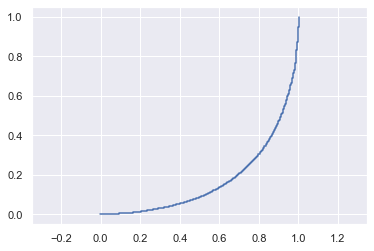

Gini= 0.6566062560271664


In [30]:
depenses = -operations_data[operations_data['montant']<0]['montant']
lorenz_plot(depenses)
print('Gini=', gini(depenses))

## Dépenses par Catégories

                        categ  montant    lorenz
0.000000              LAVERIE    94.00  0.009446
0.071429            TRANSPORT   108.50  0.020350
0.142857                HOTEL   164.86  0.036917
0.214286            VETEMENTS   220.78  0.059104
0.285714  COTISATION BANCAIRE   260.29  0.085262
0.357143    FACTURE TELEPHONE   318.71  0.117290
0.428571                SPORT   363.20  0.153789
0.500000                SANTE   379.52  0.191929
0.571429                 FOOD   437.59  0.235904
0.642857                LOYER   780.00  0.314289
0.714286                  DON   800.00  0.394684
0.785714        ACHAT & MEDIA  1673.08  0.562818
0.857143                AUTRE  1949.43  0.758723
0.928571              COURSES  2400.92  1.000000


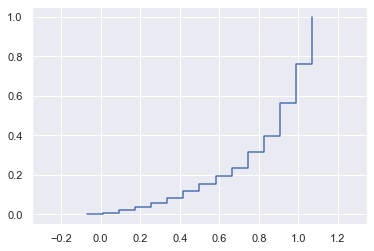

Gini= 0.5084993200888479


In [31]:
categories = operations_data['categ'].unique()
depenses_categories =pd.Series(data= [-operations_data[(operations_data['montant']<0) & (operations_data['categ']==categorie)]['montant'].sum() for categorie in categories ], index=categories).sort_values()

print(pd.DataFrame(data={'categ':depenses_categories.index, 'montant':depenses_categories.values,'lorenz': lorenz(depenses_categories)[1:]}, index=[i/len(categories) for i in range(len(categories))]))

lorenz_plot(depenses_categories)
print('Gini=', gini(depenses_categories))